### Serechenko Alexandra

Import the library with predefine functions

In [1]:
import lazy_pipeline as lpipe

Check library versions

In [2]:
from platform import python_version
import sklearn
print(python_version())
print(lpipe.pd.__version__)
print(sklearn.__version__)

3.8.8
1.2.4
1.1.3


In [3]:
import numpy as np

Load data

Mushroom hunting is a fairly widespread hobby in the world, especially for residents of Russia. I believe that in the process of collecting mushrooms, almost everyone has faced the following question: is it possible to eat this mushroom or is it poisonous? Therefore,it would be interesting for me to learn how to determine whether a mushroom is poisonous or not.

In [4]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('mushroom.arff')
df = pd.DataFrame(data[0])

df.head()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'x',b's',b'n',b't',b'p',b'f',b'c',b'n',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
1,b'x',b's',b'y',b't',b'a',b'f',b'c',b'b',b'k',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'g',b'e'
2,b'b',b's',b'w',b't',b'l',b'f',b'c',b'b',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'n',b'm',b'e'
3,b'x',b'y',b'w',b't',b'p',b'f',b'c',b'n',b'n',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'u',b'p'
4,b'x',b's',b'g',b'f',b'n',b'f',b'w',b'b',b'k',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b'a',b'g',b'e'


Description of the dataset

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
4. bruises?: bruises=t,no=f 
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
6. gill-attachment: attached=a,descending=d,free=f,notched=n 
7. gill-spacing: close=c,crowded=w,distant=d 
8. gill-size: broad=b,narrow=n 
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
10. stalk-shape: enlarging=e,tapering=t 
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
16. veil-type: partial=p,universal=u 
17. veil-color: brown=n,orange=o,white=w,yellow=y 
18. ring-number: none=n,one=o,two=t 
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

The dataset describes 22 physical features (such as stalk-root, gill-shape, cap-color, habitat, etc) of 8124 mushrooms. The set of mushrooms consists of two classes: either poisonous or edible (target variable).
A detailed description of the features is available via the dataset page (Rijn, 2014). All 22 features are categorical variables. 

Correcting the column name

In [5]:
df.columns = df.columns.str.replace('bruises%3F', 'bruises')

I set the encoding for the target variable to true - if the mushroom is edible and false - if the mushroom is poisonous.

In [6]:
df['class'] = df['class'].apply(lambda x: True  if x == b'e' else False)

In [7]:
df = df.sample(frac=1).reset_index(drop=True)
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'f',b's',b'w',b'f',b'n',b'f',b'w',b'b',b'n',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b's',b'g',True
1,b'f',b'y',b'g',b't',b'n',b'f',b'c',b'b',b'u',b't',...,b'w',b'p',b'p',b'w',b'o',b'p',b'k',b'v',b'd',True
2,b'f',b's',b'e',b'f',b's',b'f',b'c',b'n',b'b',b't',...,b'w',b'p',b'p',b'w',b'o',b'e',b'w',b'v',b'l',False
3,b'f',b'f',b'g',b't',b'n',b'f',b'c',b'b',b'u',b't',...,b'p',b'g',b'p',b'w',b'o',b'p',b'n',b'y',b'd',True
4,b'x',b'y',b'y',b'f',b'f',b'f',b'c',b'b',b'p',b'e',...,b'n',b'n',b'p',b'w',b'o',b'l',b'h',b'v',b'g',False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,b'b',b's',b'y',b't',b'a',b'f',b'c',b'b',b'w',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'g',True
8120,b'x',b'y',b'y',b't',b'l',b'f',b'c',b'b',b'p',b'e',...,b'w',b'w',b'p',b'w',b'o',b'p',b'k',b's',b'g',True
8121,b'x',b's',b'b',b't',b'f',b'f',b'c',b'b',b'w',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'h',b'v',b'u',False
8122,b'x',b'y',b'g',b't',b'n',b'f',b'c',b'b',b'n',b't',...,b'w',b'w',b'p',b'w',b'o',b'p',b'n',b'y',b'd',True


I was interested in this dataset. However, this task requires a small dataset size (several hundred lines). Therefore, I move the dataset and randomly select 1000 rows from it. This will be my dataset for this task.

In [8]:
df = df.loc[0:999]
df

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,b'f',b's',b'w',b'f',b'n',b'f',b'w',b'b',b'n',b't',...,b'w',b'w',b'p',b'w',b'o',b'e',b'n',b's',b'g',True
1,b'f',b'y',b'g',b't',b'n',b'f',b'c',b'b',b'u',b't',...,b'w',b'p',b'p',b'w',b'o',b'p',b'k',b'v',b'd',True
2,b'f',b's',b'e',b'f',b's',b'f',b'c',b'n',b'b',b't',...,b'w',b'p',b'p',b'w',b'o',b'e',b'w',b'v',b'l',False
3,b'f',b'f',b'g',b't',b'n',b'f',b'c',b'b',b'u',b't',...,b'p',b'g',b'p',b'w',b'o',b'p',b'n',b'y',b'd',True
4,b'x',b'y',b'y',b'f',b'f',b'f',b'c',b'b',b'p',b'e',...,b'n',b'n',b'p',b'w',b'o',b'l',b'h',b'v',b'g',False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,b'f',b'f',b'n',b't',b'n',b'f',b'c',b'b',b'w',b't',...,b'p',b'p',b'p',b'w',b'o',b'p',b'k',b'v',b'd',True
996,b'f',b'f',b'n',b't',b'n',b'f',b'c',b'b',b'p',b't',...,b'p',b'w',b'p',b'w',b'o',b'p',b'n',b'y',b'd',True
997,b'x',b'f',b'g',b't',b'n',b'f',b'c',b'b',b'n',b't',...,b'g',b'g',b'p',b'w',b'o',b'p',b'k',b'v',b'd',True
998,b'x',b'y',b'e',b't',b'n',b'f',b'c',b'b',b'w',b't',...,b'p',b'g',b'p',b'w',b'o',b'p',b'n',b'y',b'd',True


Binarize data

All independent variables are categorical. Therefore, it is necessary to create separate columns for each category: if the observation has this characteristic, then it is true, in another case it is false. Binarization must be performed for all variables .

In [9]:
y_name = 'class'

In [10]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(1000, 113)


,cap-shape: b'b',cap-shape: b'f',cap-shape: b'k',cap-shape: b's',cap-shape: b'x',cap-surface: b'f',cap-surface: b's',cap-surface: b'y',cap-color: b'b',cap-color: b'c',...,population: b's',population: b'v',population: b'y',habitat: b'd',habitat: b'g',habitat: b'l',habitat: b'm',habitat: b'p',habitat: b'u',habitat: b'w'
0,False,True,False,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,False
3,False,True,False,False,False,True,False,False,False,False,...,False,False,True,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False


Shuffle the data to drop any initial ordering of rows.

In [11]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

Represent data  as list of subsets of attributes to better suit the theory.

In [12]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]
X_bin[0]

{"bruises: b't'",
 "cap-color: b'n'",
 "cap-shape: b'f'",
 "cap-surface: b'y'",
 "gill-attachment: b'f'",
 "gill-color: b'n'",
 "gill-size: b'b'",
 "gill-spacing: b'c'",
 "habitat: b'd'",
 "odor: b'n'",
 "population: b'y'",
 "ring-number: b'o'",
 "ring-type: b'p'",
 "spore-print-color: b'n'",
 "stalk-color-above-ring: b'p'",
 "stalk-color-below-ring: b'w'",
 "stalk-root: b'b'",
 "stalk-shape: b't'",
 "stalk-surface-above-ring: b's'",
 "stalk-surface-below-ring: b's'",
 "veil-color: b'w'",
 "veil-type: b'p'"}

And, for being consisted, convert  to list too.

In [13]:
y = y.values.tolist()

Assume that at the very begining, we know the labels only for the first 20% of rows.

In [14]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(100, 900)

Set up the test target labels

In [15]:
y_test = y[n_train:]

Make predictions and measure time required to obtain these predictions

In [16]:
%%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|█████████████████████████████████████████████████████| 1000/1000 [01:51<00:00,  8.10it/s]

CPU times: total: 1min 49s
Wall time: 1min 51s


In [17]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 250.95it/s]

CPU times: total: 3.58 s
Wall time: 3.6 s


Evaluate predictions

Accuracy represents the number of correctly classified data instances over the total number of data instances.

Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. 

Recall should ideally be 1 (high) for a good classifier. Recall becomes 1 only when the numerator and denominator are equal i.e TP = TP +FN, this also means FN is zero.

F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

In [18]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
score_vals = {}
for score_f in [accuracy_score, f1_score, recall_score, precision_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]


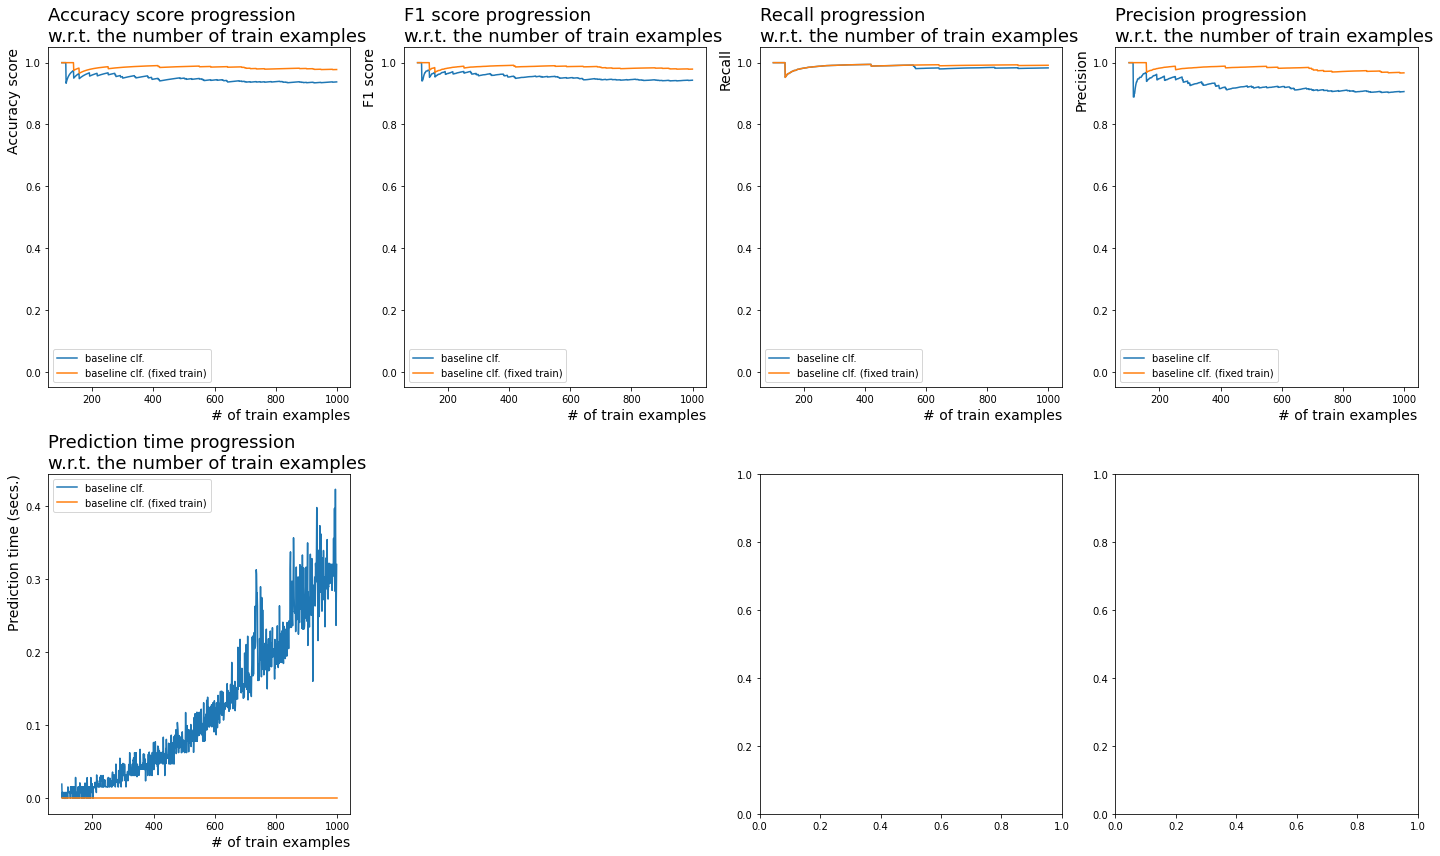

In [19]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1)  # Replace default "transparent" background of the figure with the "white" one


fig, axs = plt.subplots(2, 4, figsize=(20, 12))

# First two plots are for prediction quality comparison
for ax, t in zip(axs[0],['accuracy_score', 'f1_score', 'recall_score' , 'precision_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
# The third plot is for prediction speed comparison
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

# Add labels and titles to the plots
for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Recall', "Precision", 'Prediction time', ], ['','', '', '','(secs.)',]):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', loc='right', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), loc='top', size=14)
    ax.legend()
    
# Drop the predefined fourth plot since we do not use it
axs[1,1].set_axis_off()    

# Some postprocessing of plots
plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [20]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

94.7138247841999

In [21]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

95.34505699179633

In [22]:
sum(score_vals['recall_score'])/len(score_vals['recall_score'])*100

98.58085755435519

In [23]:
sum(score_vals['precision_score'])/len(score_vals['precision_score'])*100

92.33315791038808

It can be concluded that the original algorithm is quite good in terms of quality indicators. However, in terms of speed - when adding observations, the algorithm will work slowly.

In [29]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))

In [30]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

In [58]:
from sklearn.model_selection import train_test_split
# Split data for train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10,test_size=0.113)

In [68]:
def algorithm2(y_pred):
    for test_obj in X_test:
        pos = np.sum(test_obj == X_train_pos) / float(len(X_train_pos))
        neg = np.sum(test_obj == X_train_neg) / float(len(X_train_neg))
        if (np.sum(neg) < np.sum(pos)):
            y_pred.append(1)
        else:
            y_pred.append(0)

In [69]:
X_train_pos = X_train[y_train == 1]
X_train_neg = X_train[y_train == 0]

In [70]:
y_pred = []

algorithm2(y_pred)

y_pred = np.array(y_pred)

In [71]:
accuracy_score(y_test, y_pred)

0.5132743362831859

In [63]:
f1_score(y_test, y_pred)

0.0

In [64]:
recall_score(y_test, y_pred)

0.0

In [65]:
precision_score(y_test, y_pred)

C:\Users\alexs\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

The algorithm I proposed does not work well on data, despite the fact that in terms of speed it wins the first algorithm.

Let's see how other models cope with the prediction

In [49]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

print("Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))

Test Accuracy: 99.12%


In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

print("Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))

Test Accuracy: 100.0%


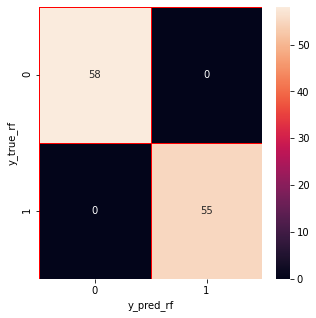

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Random Forest
y_pred_rf = rf.predict(X_test)
y_true_rf = y_test
cm = confusion_matrix(y_true_rf, y_pred_rf)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

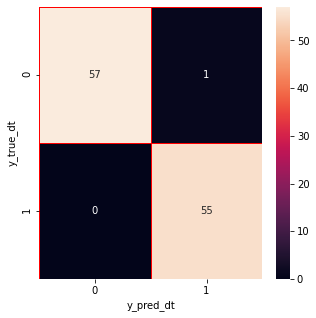

In [53]:
# DecisionTree
y_pred_dt = dt.predict(X_test)
y_true_dt = y_test
cm = confusion_matrix(y_true_dt, y_pred_dt)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_dt")
plt.ylabel("y_true_dt")
plt.show()